In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
import ROOT
import datetime
from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
from scipy.misc import factorial
plt.rcParams.update({'font.size': 16})

In [2]:
from decode import GetWaveforms

In [3]:
from datetime import datetime

In [4]:
def gettime(name):
    date = name.split('PrM1-')[-1].split('.dat')[0]
    time = datetime.strptime(date,'%Y_%m_%d-%H_%M_%S')
    return time

In [5]:
def QaQc(wf_v):
    anode_v = wf_v[0][700:]
    cathode_v = wf_v[1][500:]
    Qa = np.amax(anode_v)
    Qc = np.amin(cathode_v)
    return Qa,Qc

def QaQcSTATS(ev_wf_v):
    
    Qa_v = []
    Qc_v = []
    for wf_v in ev_wf_v:
        Qa,Qc = QaQc(wf_v)
        Qa_v.append(Qa*1e3)
        Qc_v.append(Qc*1e3)
    Qa_v = np.array(Qa_v)
    Qc_v = np.array(Qc_v)

    Qa_avg = np.mean(Qa_v)
    Qa_rms = np.std(Qa_v)
    Qc_avg = np.mean(Qc_v)
    Qc_rms = np.std(Qc_v)
    
    return [[Qa_avg,Qa_rms],[Qc_avg,Qc_rms]]

In [6]:
PATH = '/home/david/Dropbox/Neutrinos/LArCADe/Run1/'
datafile_v = os.listdir(PATH)

0.0005


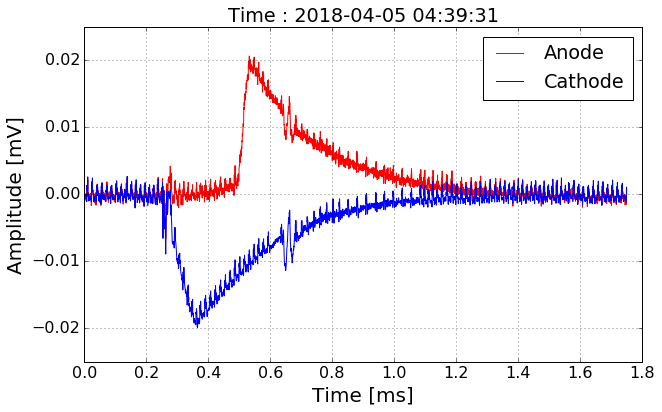

In [10]:
datafile = PATH + datafile_v[0]
ev_wf_v = GetWaveforms(datafile)
time = gettime(datafile_v[0])
dt = 0.0005
time_v = np.linspace(0,dt*len(ev_wf_v[0][0]),len(ev_wf_v[0][0]))


fig = plt.figure(figsize=(10,6))
plt.plot(time_v,ev_wf_v[0][0],color='r',label='Anode')
plt.plot(time_v,ev_wf_v[0][1],color='b',label='Cathode')
plt.grid()
plt.legend(loc=1)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Amplitude [mV]',fontsize=20)
plt.title('Time : %s'%time)
plt.ylim([-0.025,0.025])
plt.show()

In [12]:
date_v = []
Qa_avg_v = []
Qa_rms_v = []
Qc_avg_v = []
Qc_rms_v = []

for datafile in datafile_v:
    if (datafile.find('.dat') < 0): continue
    time = gettime(datafile)
    fin = PATH+datafile
    try:
        ev_wf_v = GetWaveforms(fin)
        res = QaQcSTATS(ev_wf_v)
        Qa_avg = res[0][0]
        Qa_rms = res[0][1]
        Qc_avg = res[1][0]
        Qc_rms = res[1][1]
        print 'At %s Qa : %.02f +/- %.02f mV Qc : %.02f +/- %.02f mV'%(time,Qa_avg,Qa_rms,Qc_avg,Qc_rms)
        date_v.append(time)
        Qa_avg_v.append(Qa_avg)
        Qc_avg_v.append(Qc_avg)
        Qa_rms_v.append(Qa_rms)
        Qc_rms_v.append(Qc_rms)
    except:
        print 'failure @ file %s'%datafile
        
date_v = matplotlib.dates.date2num(date_v)

0.0005
At 2018-04-05 04:39:31 Qa : 20.58 +/- 0.83 mV Qc : -19.27 +/- 1.34 mV
0.0005
At 2018-04-05 00:59:29 Qa : 21.96 +/- 0.83 mV Qc : -20.42 +/- 1.56 mV
0.0005
At 2018-04-05 01:59:29 Qa : 21.46 +/- 1.03 mV Qc : -19.75 +/- 1.28 mV
0.0005
At 2018-04-05 10:23:23 Qa : 10.25 +/- 0.68 mV Qc : -18.59 +/- 1.93 mV
0.0005
At 2018-04-05 11:33:30 Qa : 4.66 +/- 1.84 mV Qc : -7.04 +/- 3.73 mV
0.0005
At 2018-04-05 12:13:30 Qa : 4.47 +/- 1.70 mV Qc : -6.71 +/- 3.42 mV
0.0005
At 2018-04-05 13:33:30 Qa : 6.51 +/- 1.31 mV Qc : -8.87 +/- 2.65 mV
0.0005
At 2018-04-05 02:59:30 Qa : 21.12 +/- 0.70 mV Qc : -19.77 +/- 1.45 mV
0.0005
At 2018-04-04 23:59:28 Qa : 21.53 +/- 0.63 mV Qc : -19.98 +/- 1.48 mV
0.0005
At 2018-04-05 13:13:30 Qa : 5.40 +/- 1.68 mV Qc : -6.87 +/- 3.41 mV
0.0005
At 2018-04-05 10:11:58 Qa : 20.76 +/- 0.77 mV Qc : -18.82 +/- 1.57 mV
0.0005
At 2018-04-05 10:11:21 Qa : 20.43 +/- 0.98 mV Qc : -18.50 +/- 1.29 mV
0.0005
At 2018-04-05 01:39:29 Qa : 21.57 +/- 0.78 mV Qc : -19.76 +/- 0.91 mV
0.0005


51
51


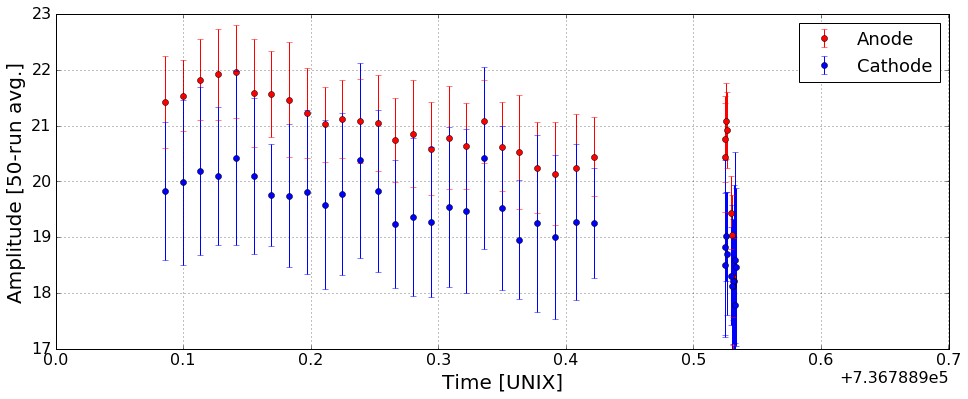

In [30]:
fig = plt.figure(figsize=(16,6))

print len(date_v)
print len(Qa_avg_v)

#plt.plot_date(date_v,np.abs(Qa_avg_v))
#plt.plot_date(date_v,np.abs(Qc_avg_v))

plt.errorbar(date_v,np.abs(Qa_avg_v),yerr=Qa_rms_v,fmt='o',color='r',label='Anode')
plt.errorbar(date_v,np.abs(Qc_avg_v),yerr=Qc_rms_v,fmt='o',color='b',label='Cathode')

#plt.xlim([7.2e5,7.4e5])

plt.ylim([17,23])
plt.grid()
plt.legend(numpoints=1,fontsize=18)
plt.xlabel('Time [UNIX]',fontsize=20)
plt.ylabel('Amplitude [50-run avg.]',fontsize=20)
plt.show()